# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry.

---


Predicting passenger satisfaction offers wide-range of benefits to the airline industry. By leveraging data and machine learning models, airlines can proactively identify factors that influence passenger satisfaction and dissatisfaction. This allows them to make targeted improvements to their services, such as refining seat comfort, improving in-flight entertainment, or providing better customer support. Ultimately, predicting passenger satisfaction empowers airlines to streamline their operations, reduce customer churn, and boost their competitive advantage in the market.

## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.


In [26]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               0              2  ...               2                       3   
1               0              3  ...               2                       3   
2               0              3  ...               2                       2   
3               0              3  ...               3                       1   
4               0              3  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 22 columns]


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.



satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


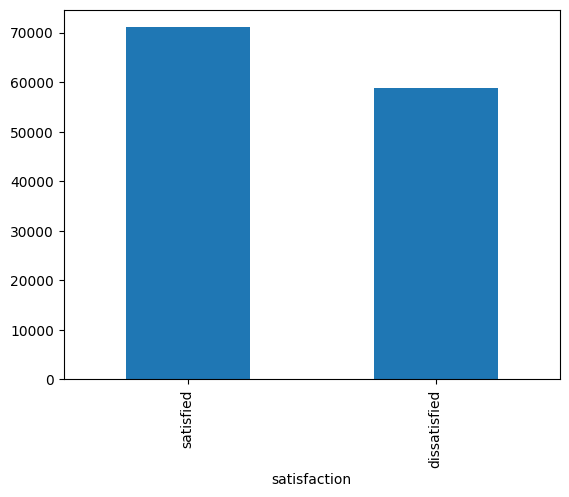

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: object

In [27]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
print(df['satisfaction'].value_counts())

df['satisfaction'].value_counts().plot(kind='bar')
plt.show()

# Display data types
df.dtypes


In [28]:
df.shape

(129880, 22)


## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.



In [29]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical variables: {categorical_cols}")

Categorical variables: Index(['satisfaction', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')


In [30]:
num_categorical_cols = len(categorical_cols)
print(f"Number of categorical variables: {num_categorical_cols}")

Number of categorical variables: 4


In [31]:
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['satisfaction', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Define the target variable and features
X = df_encoded.drop('satisfaction_satisfied', axis=1)
y = df_encoded['satisfaction_satisfied']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.


In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Define the parameters for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   3.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_es


## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.


Accuracy: 0.9584616569140745
Precision: 0.9708689458689459
Recall: 0.953150129361583
F1 Score: 0.9619279489079425


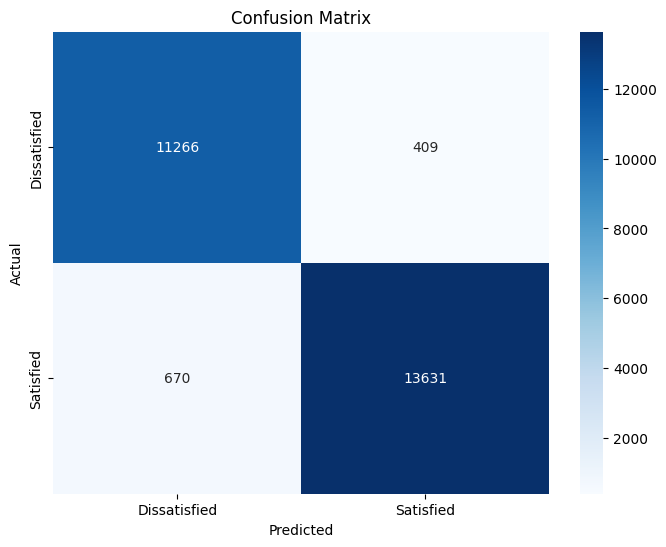

<Figure size 1000x600 with 0 Axes>

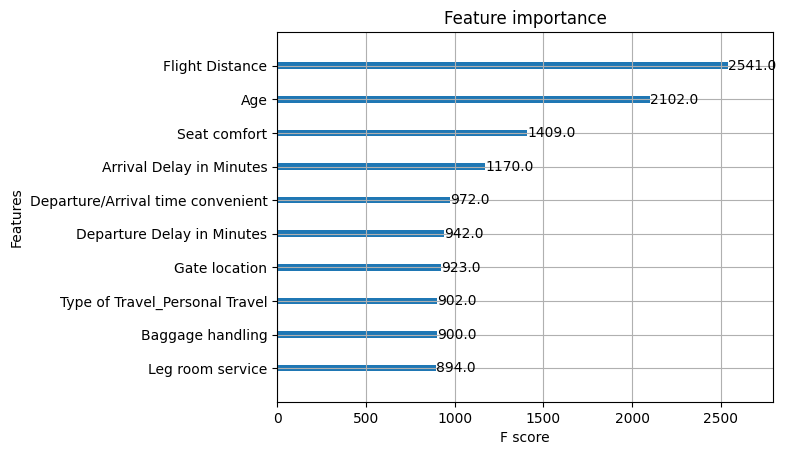

In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
xgb_best = grid_search.best_estimator_
plt.figure(figsize=(10,6))
xgb_best.get_booster().feature_names = list(X.columns)
xgb.plot_importance(xgb_best, max_num_features=10)
plt.show()



## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Compare model performance
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"XGBoost Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9335540498922081
Random Forest Accuracy: 0.9568832768709578
XGBoost Accuracy: 0.9584616569140745


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
- Consider how the model's insights can be applied to improve airline services.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different features on passenger satisfaction.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.
- Recommend strategies to improve services based on the model's insights.

#**What are some key takeaways you learned from this project?**#
- Hyperparameter tuning is crucial for optimizing the performance of the XGBoost model. By using GridSearchCV, the project demonstrated how to systematically explore different parameter combinations and identify the best settings for maximizing accuracy.
- The project highlighted the significance of feature engineering in improving model performance. By carefully selecting and transforming features, we can enhance the model's ability to learn patterns and make accurate predictions.

#**How would you share your findings with a team?**#
- Create a clear and concise presentation that outlines the project's objectives, methodology, results, and key takeaways.
- Clearly present the evaluation metrics, such as accuracy, precision, recall, and F1 score, to demonstrate the model's performance.
- Discuss the features that were identified as most influential in predicting passenger satisfaction.

#**What would you share with and recommend to stakeholders?**#
- Focus on the most important features: Clearly identify the top features that contribute most to passenger satisfaction, such as seat comfort, online booking experience, and in-flight entertainment. Visualizations, such as a feature importance plot, can effectively showcase these key drivers.
- Prioritize areas for improvement: Based on the model's findings, recommend specific areas where the airline can focus its efforts to improve passenger satisfaction. For example, if online booking experience is a key driver, suggest investing in a more user-friendly website or mobile app.
